In [ ]:
#Import all Dependencies 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout

In [ ]:
#download the cifar10 dataset 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


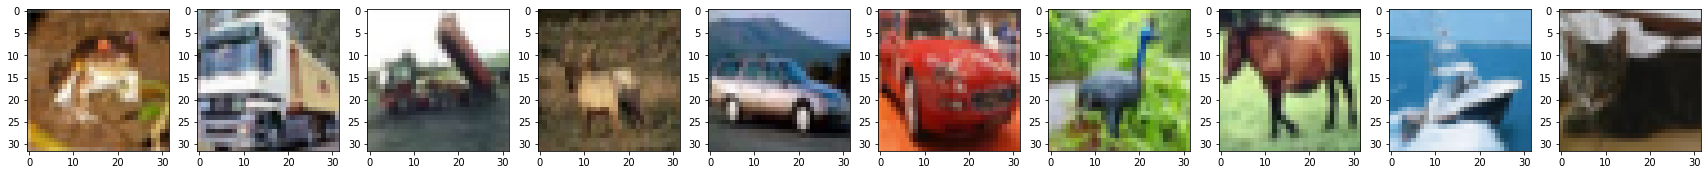

In [ ]:
#plotting the first 10 images 
fig, axes = plt.subplots(1, 10, figsize = (30, 10))
for img, ax in zip(x_train[:10], axes):
  ax.imshow(img, interpolation = None)
plt.show()

In [ ]:
#Changing the data type of training and testing data and normalizing them
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [ ]:
#Changing the images to grayscale
def grayscale(data, dtype='float32'):
  # luma coding weighted average in video systems
  r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
  rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
  # add channel dimension
  rst = np.expand_dims(rst, axis=3)
  return rst

X_train_gray = grayscale(x_train)
X_test_gray = grayscale(x_test)

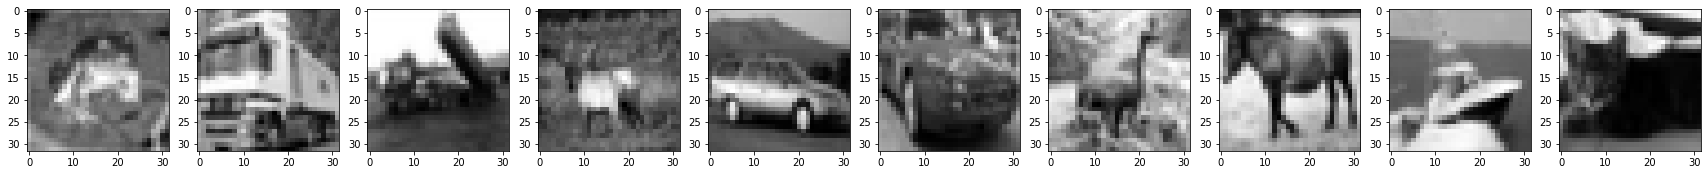

In [ ]:
#plotting the first 10 images again to ensure the mages are in grayscale
display_images = X_train_gray.reshape(-1, 32,32)
fig, axes = plt.subplots(1, 10, figsize = (30, 10))
for img, ax in zip(display_images[:10], axes):
  ax.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

***Building the first model***

The first ANN built was one with an input layer, 8 hidden layers and an output layer. Each of the 8 hidden layers had 512 units (perceptrons) which were with the Rectified Linear Unit (ReLU) activation function. ReLU is a non-linear function that takes the maximum argument between a value passed to it and 0. The final layer uses a softmax function to output a series of probabilities relating to each class and the class with the highest probability is chosen as the class of the input image. 

The training and validation sets have been split in an 80:20 ratio.

In [ ]:
#creating the model with 8 hidden layers aside the input and output layers
model = keras.Sequential([keras.layers.Flatten(input_shape = (32, 32)), 
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(512, activation="relu"), 
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(10, activation= "softmax")])

In [ ]:
#compiling the model with the adam optimizer, cross entropy loss, and accuracy as the metric
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#training the model
training_summary = model.fit(X_train_gray, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 3s 4ms/step - loss: 2.1065 - accuracy: 0.2103 - val_loss: 2.0662 - val_accuracy: 0.2252
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9976 - accuracy: 0.2642 - val_loss: 1.9947 - val_accuracy: 0.2708
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9381 - accuracy: 0.2984 - val_loss: 1.9125 - val_accuracy: 0.3076
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9003 - accuracy: 0.3113 - val_loss: 1.8805 - val_accuracy: 0.3227
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8674 - accuracy: 0.3244 - val_loss: 1.8622 - val_accuracy: 0.3269
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8264 - accuracy: 0.3405 - val_loss: 1.8370 - val_accuracy: 0.3249
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 1.7897 - accuracy: 0.3561 - val_loss: 1.8513 - val_accuracy: 0.3346
Epoch 

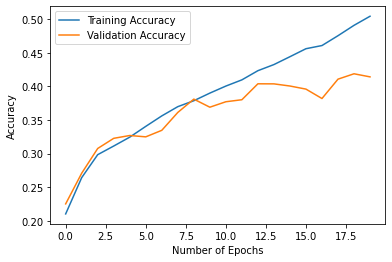

In [ ]:

plt.plot(training_summary.history["accuracy"], label = "Training Accuracy")
plt.plot(training_summary.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()


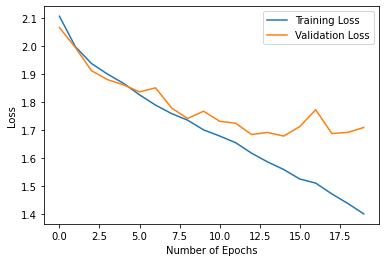

In [ ]:
plt.plot(training_summary.history["loss"], label = "Training Loss")
plt.plot(training_summary.history["val_loss"], label = "Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

***Second Model***

The second model will be constructed with four layers instead of 8. Each layer has 512, 256, 64, and 32 neurons in each layer respectively.

In [ ]:
#creating the model with 8 hidden layers aside the input and output layers
second_model = keras.Sequential([keras.layers.Flatten(input_shape = (32, 32)), 
                          keras.layers.Dense(512, activation="relu"),
                          keras.layers.Dense(256, activation="relu"),
                          keras.layers.Dense(64, activation="relu"), 
                          keras.layers.Dense(32, activation="relu"),
                          keras.layers.Dense(10, activation= "softmax")])


In [ ]:
#compiling the model with the adam optimizer, cross entropy loss, and accuracy as the metric
second_model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#training the model
second_training_summary = second_model.fit(X_train_gray, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 2.1051 - accuracy: 0.2203 - val_loss: 2.0749 - val_accuracy: 0.2532
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9485 - accuracy: 0.2966 - val_loss: 1.9098 - val_accuracy: 0.3062
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8878 - accuracy: 0.3205 - val_loss: 1.9097 - val_accuracy: 0.3124
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8388 - accuracy: 0.3409 - val_loss: 1.8695 - val_accuracy: 0.3359
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.7995 - accuracy: 0.3587 - val_loss: 1.7909 - val_accuracy: 0.3638
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 1.7570 - accuracy: 0.3767 - val_loss: 1.7733 - val_accuracy: 0.3653
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 1.7306 - accuracy: 0.3844 - val_loss: 1.7482 - val_accuracy: 0.3768
Epoch 

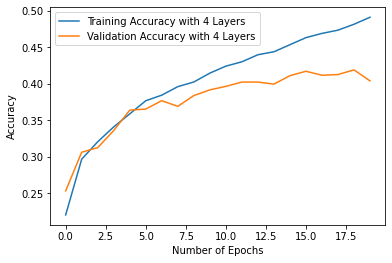

In [ ]:

plt.plot(second_training_summary.history["accuracy"], label = "Training Accuracy with 4 Layers")
plt.plot(second_training_summary.history["val_accuracy"], label = "Validation Accuracy with 4 Layers")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()

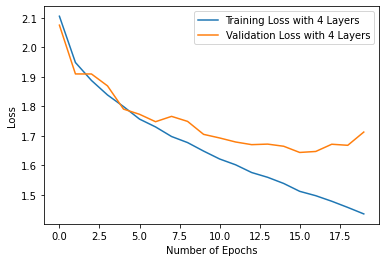

In [ ]:
plt.plot(second_training_summary.history["loss"], label = "Training Loss with 4 Layers")
plt.plot(second_training_summary.history["val_loss"], label = "Validation Loss with 4 Layers")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#creating the model with 8 hidden layers aside the input and output layers
regularized_model = keras.Sequential([keras.layers.Flatten(input_shape = (32, 32)), 
                          keras.layers.Dense(512, activation="relu", kernel_regularizer= regularizers.l2(0.0008)),
                          keras.layers.Dense(256, activation="relu", kernel_regularizer= regularizers.l2(0.0008)),
                          keras.layers.Dense(64, activation="relu", kernel_regularizer= regularizers.l2(0.0008)), 
                          keras.layers.Dense(32, activation="relu", kernel_regularizer= regularizers.l2(0.0008)),
                          keras.layers.Dense(10, activation= "softmax")])

In [ ]:
#compiling the model with the adam optimizer, cross entropy loss, and accuracy as the metric
regularized_model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

#training the model
regularized_training_summary = regularized_model.fit(X_train_gray, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 2s 3ms/step - loss: 2.4572 - accuracy: 0.2211 - val_loss: 2.1898 - val_accuracy: 0.2555
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 2.1106 - accuracy: 0.2814 - val_loss: 2.0558 - val_accuracy: 0.2910
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 2.0349 - accuracy: 0.3027 - val_loss: 2.0393 - val_accuracy: 0.2985
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9906 - accuracy: 0.3187 - val_loss: 1.9779 - val_accuracy: 0.3137
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9528 - accuracy: 0.3273 - val_loss: 1.9703 - val_accuracy: 0.3292
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9350 - accuracy: 0.3359 - val_loss: 1.9037 - val_accuracy: 0.3421
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 1.9031 - accuracy: 0.3485 - val_loss: 1.9303 - val_accuracy: 0.3374
Epoch 

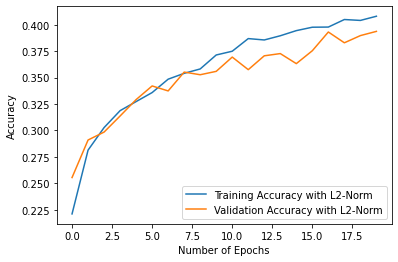

In [ ]:
plt.plot(regularized_training_summary.history["accuracy"], label = "Training Accuracy with L2-Norm")
plt.plot(regularized_training_summary.history["val_accuracy"], label = "Validation Accuracy with L2-Norm")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()

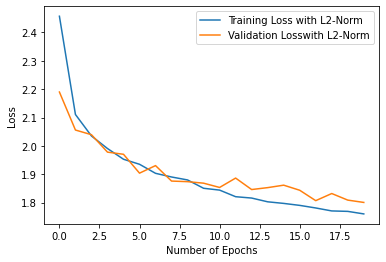

In [ ]:
plt.plot(regularized_training_summary.history["loss"], label = "Training Loss with L2-Norm")
plt.plot(regularized_training_summary.history["val_loss"], label = "Validation Losswith L2-Norm")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#creating the model with 8 hidden layers aside the input and output layers
reg_drop_model = keras.Sequential([keras.layers.Flatten(input_shape = (32, 32)), 
                          keras.layers.Dense(512, activation="relu", kernel_regularizer= "l2"),
                          keras.layers.Dense(256, activation="relu", kernel_regularizer= "l2"),
                          keras.layers.Dense(64, activation="relu", kernel_regularizer= "l2"), 
                          keras.layers.Dense(32, activation="relu", kernel_regularizer= "l2"),
                          keras.layers.Dropout(0.2, noise_shape=None, seed=None),
                          keras.layers.Dense(10, activation= "softmax")])

In [ ]:
#compiling the model with the adam optimizer, cross entropy loss, and accuracy as the metric
reg_drop_model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

#training the model
reg_drop_training_summary = reg_drop_model.fit(X_train_gray, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 2s 4ms/step - loss: 3.4039 - accuracy: 0.1575 - val_loss: 2.2890 - val_accuracy: 0.1766
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 2.2335 - accuracy: 0.1777 - val_loss: 2.2181 - val_accuracy: 0.1945
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 2.1926 - accuracy: 0.1998 - val_loss: 2.1740 - val_accuracy: 0.2031
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 2.1694 - accuracy: 0.2086 - val_loss: 2.1905 - val_accuracy: 0.2057
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 2.1621 - accuracy: 0.2133 - val_loss: 2.1465 - val_accuracy: 0.2194
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 2.1521 - accuracy: 0.2167 - val_loss: 2.1635 - val_accuracy: 0.2162
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 2.1438 - accuracy: 0.2193 - val_loss: 2.1291 - val_accuracy: 0.2269
Epoch 

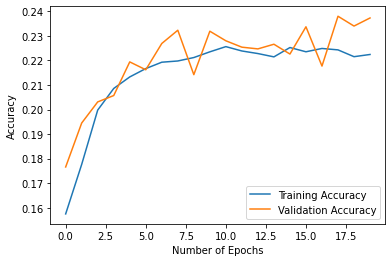

In [ ]:
plt.plot(reg_drop_training_summary.history["accuracy"], label = "Training Accuracy")
plt.plot(reg_drop_training_summary.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()

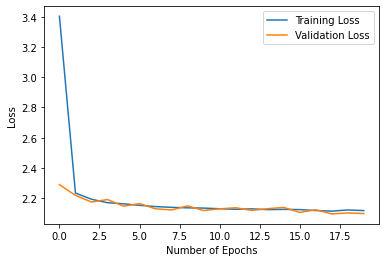

In [ ]:
plt.plot(reg_drop_training_summary.history["loss"], label = "Training Loss")
plt.plot(reg_drop_training_summary.history["val_loss"], label = "Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()